**Observed Trends**
- Overall compound sentiment for the last 100 Tweets for all five media channels is negative
- Fox News and BBC World compound sentiments are the most negative
- NY Times is the only Media Source with an overall positive sentiment

In [438]:
# Dependencies
import tweepy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import csv
import pandas as pd

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from localenv import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [439]:
# Target User Account BBC, CBS, CNN, Fox, and New York times
target_user = ("@BBCWorld", "@CBSNews", "@CNN", "@FoxNews", "@nytimes")

# Variables for holding sentiments
sentiments = []
oldest_tweet = None

# Counter
counter = 1

for target in target_user:

    # Get 100 tweets from home feed
    public_tweets = api.user_timeline(target,
                                      count=100,
                                      result_type="recent",
                                      max_id=oldest_tweet)

    # Loop through all tweets
    for tweet in public_tweets:

        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = counter
        

            # Add each value to the appropriate list
        sentiments.append({"Date": tweet["created_at"], 
                           "Media": target,
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter
                           })
        # Add to counter 
        counter = counter + 1
    counter=1
oldest_tweet = int(tweet['id_str']) - 1

In [440]:
#Create DataFrame
sentiment = pd.DataFrame.from_dict(sentiments)
sentiment.head()

,Compound,Date,Media,Negative,Neutral,Positive,Tweets Ago
0,0.0000,Sat Mar 10 09:02:46 +0000 2018,@BBCWorld,1.000,0.000,0.000,1
1,0.1139,Sat Mar 10 08:46:00 +0000 2018,@BBCWorld,0.659,0.157,0.184,2
2,0.5719,Sat Mar 10 06:38:00 +0000 2018,@BBCWorld,0.598,0.000,0.402,3
3,-0.1280,Sat Mar 10 06:07:53 +0000 2018,@BBCWorld,0.842,0.158,0.000,4
4,-0.4019,Sat Mar 10 05:55:35 +0000 2018,@BBCWorld,0.748,0.252,0.000,5


In [441]:
#Save df to CSV
sentiment.to_csv("Sentiment_Analysis")

In [442]:
#Obtain x and y coordinates for each media
BBC = sentiment[sentiment["Media"] == "@BBCWorld"]
CBSNews = sentiment[sentiment["Media"] == "@CBSNews"]
CNN = sentiment[sentiment["Media"] == "@CNN"]
FoxNews = sentiment[sentiment["Media"] == "@FoxNews"]
nytimes = sentiment[sentiment["Media"] == "@nytimes"]

BBC_Tweets = pd.DataFrame(BBC.groupby('Tweets Ago')['Compound'].unique())
BBC_Tweets.reset_index(inplace=True)
BBC_Tweets.columns=['Tweets Ago', 'Compound']

CBS_Tweets = pd.DataFrame(CBSNews.groupby('Tweets Ago')['Compound'].unique())
CBS_Tweets.reset_index(inplace=True)
CBS_Tweets.columns=['Tweets Ago', 'Compound']

CNN_Tweets = pd.DataFrame(CNN.groupby('Tweets Ago')['Compound'].unique())
CNN_Tweets.reset_index(inplace=True)
CNN_Tweets.columns=['Tweets Ago', 'Compound']

Fox_Tweets = pd.DataFrame(FoxNews.groupby('Tweets Ago')['Compound'].unique())
Fox_Tweets.reset_index(inplace=True)
Fox_Tweets.columns=['Tweets Ago', 'Compound']

NYT_Tweets = pd.DataFrame(nytimes.groupby('Tweets Ago')['Compound'].unique())
NYT_Tweets.reset_index(inplace=True)
NYT_Tweets.columns=['Tweets Ago', 'Compound']

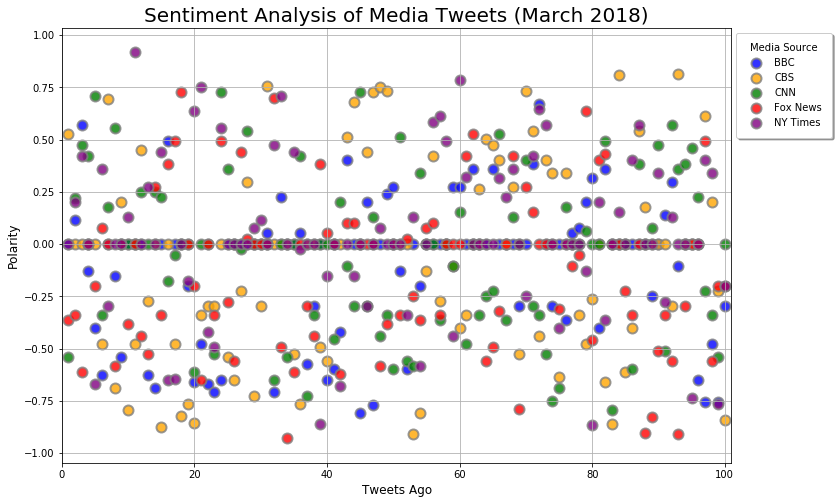

In [443]:
#Plot Compound vs. Tweets
plt.figure(figsize=(12,8))

plt.scatter(BBC_Tweets['Tweets Ago'],
            BBC_Tweets['Compound'],
            s=100,
            c="blue",
            alpha=0.8, 
            linewidths=2,
            edgecolors='grey', 
            label="BBC")

plt.scatter(CBS_Tweets['Tweets Ago'],
            CBS_Tweets['Compound'],
            s=100,
            c="orange",
            alpha=0.8, 
            linewidths=2,
            edgecolors='grey', 
            label="CBS")

plt.scatter(CNN_Tweets['Tweets Ago'],
            CNN_Tweets['Compound'],
            s=100,
            c="green",
            alpha=0.8, 
            linewidths=2,
            edgecolors='grey', 
            label="CNN")

plt.scatter(Fox_Tweets['Tweets Ago'],
            Fox_Tweets['Compound'],
            s=100,
            c="red",
            alpha=0.8, 
            linewidths=2,
            edgecolors='grey', 
            label="Fox News")

plt.scatter(NYT_Tweets['Tweets Ago'],
            NYT_Tweets['Compound'],
            s=100,
            c="purple",
            alpha=0.8, 
            linewidths=2,
            edgecolors='grey', 
            label="NY Times")

plt.xlabel("Tweets Ago", fontsize='large')
plt.ylabel("Polarity", fontsize='large')
plt.title("Sentiment Analysis of Media Tweets (March 2018)", size=20)
plt.xlim(0,101)

plt.legend(bbox_to_anchor=(1, 1), title="Media Source", fancybox=True, shadow=True, borderpad=1)

plt.grid(True)
plt.show()
plt.savefig("Analysis_3-10-2018.png")

In [444]:
ttl_sentiment = pd.DataFrame(sentiment.groupby('Media')['Compound'].sum())
ttl_sentiment.reset_index(inplace=True)
ttl_sentiment.columns=['Media', 'Compound']
ttl_sentiment

,Media,Compound
0,@BBCWorld,-10.5354
1,@CBSNews,-7.1409
2,@CNN,-3.8184
3,@FoxNews,-12.2082
4,@nytimes,3.7227


In [445]:
overall_sent = ttl_sentiment['Compound'].sum()
overall_sent

-29.9802

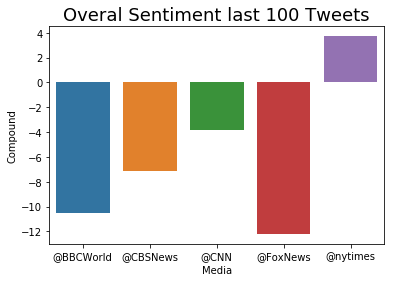

In [446]:
# Overall sentiments of the last 100 tweets from each media source:
sns.barplot(ttl_sentiment['Media'], ttl_sentiment['Compound'])
plt.title("Overal Sentiment last 100 Tweets", size=18)
plt.show()
plt.savefig("Sentiment_Overall_3-10-2018.png")